## Kue Dataset - Explore


In [1]:
## reinstall tf and keras
# !conda install keras
# !conda install tensorflow
# !conda install tensorflow-gpu
# !conda install cudnn=7.6.5=cuda10.1_0 --> cuda version is 10.1


In [2]:
import os
import re
import glob

import scipy.io
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import shutil

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.io import loadmat
import random

In [3]:
# PATH_DATA = '../data/'
PATH_DATA_IMAGES = '../../dataset257/'
PATH_DATA_TRAIN = PATH_DATA_IMAGES+'train/'
PATH_DATA_VAL = PATH_DATA_IMAGES+'validation/'
PATH_DATA_TEST = PATH_DATA_IMAGES+'test/'
# PATH_MODEL = '../../../tmp/'

## Simple Exploring

There is one gif in train/kue_lumpur/84.gif, train/kue_klepon/130.gif, train/kue_klepon/118.gif
'../../dataset257/train/kue_klepon/198.gif',
 '../../dataset257/train/kue_putri_salju/161.gif',
 '../../dataset257/train/kue_putri_salju/11.gif',
 '../../dataset257/train/kue_serabi/6.gif'

In [4]:
## label dict
lab = [i for i in os.listdir(PATH_DATA_TRAIN) if '.' not in i]
lab.sort()

label_dict = dict(zip(lab,[i for i in range(len(lab))]))
label_dict

{'kue_dadar_gulung': 0,
 'kue_kastengel': 1,
 'kue_klepon': 2,
 'kue_lapis': 3,
 'kue_lumpur': 4,
 'kue_putri_salju': 5,
 'kue_risoles': 6,
 'kue_serabi': 7}

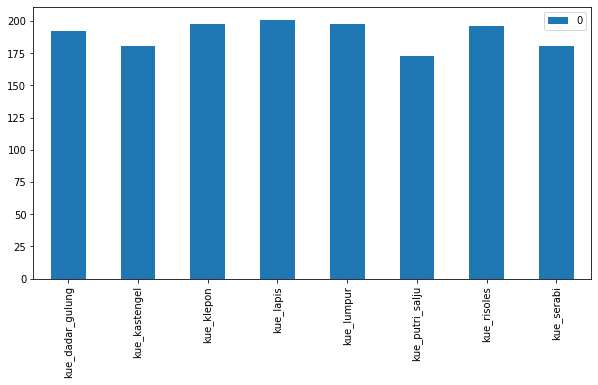

In [5]:
label_train = {}
for i in lab:
    label_train[i] = [len(os.listdir(PATH_DATA_TRAIN+i))]
    
pd.DataFrame(label_train).transpose().plot(kind = 'bar', figsize = (10,5))

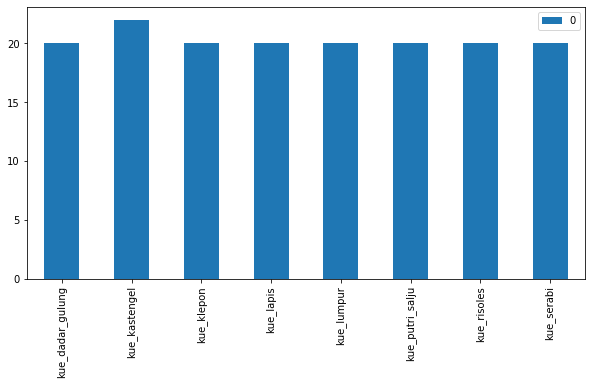

In [6]:
label_test = {}
for i in lab:
    label_test[i] = [len(os.listdir(PATH_DATA_TEST+i))]
    
pd.DataFrame(label_test).transpose().plot(kind = 'bar', figsize = (10,5))

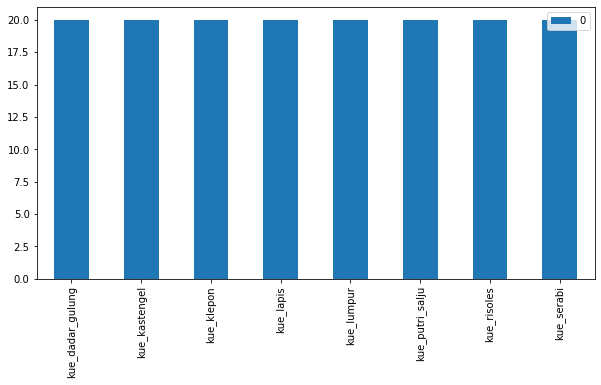

In [7]:
label_val = {}
for i in lab:
    label_val[i] = [len(os.listdir(PATH_DATA_VAL+i))]
    
pd.DataFrame(label_val).transpose().plot(kind = 'bar', figsize = (10,5))

In [8]:
lab

['kue_dadar_gulung',
 'kue_kastengel',
 'kue_klepon',
 'kue_lapis',
 'kue_lumpur',
 'kue_putri_salju',
 'kue_risoles',
 'kue_serabi']

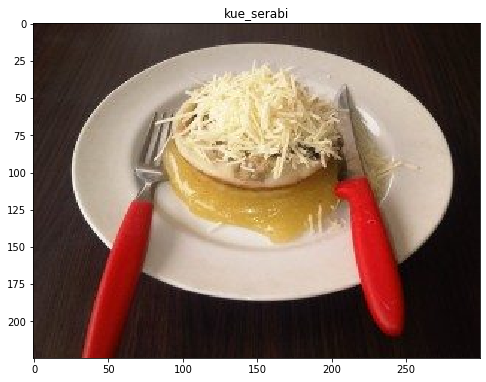

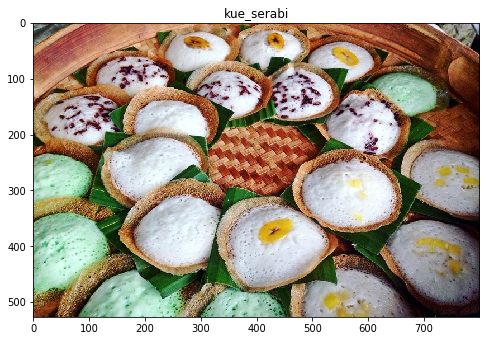

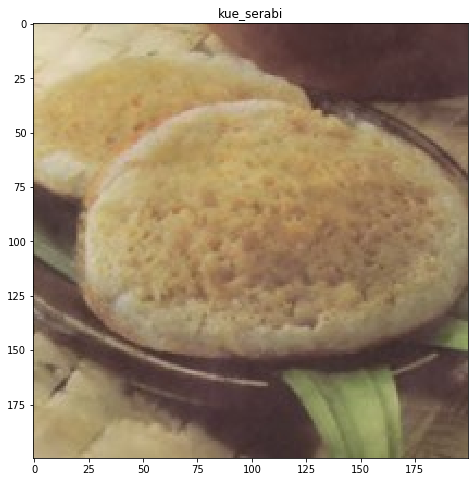

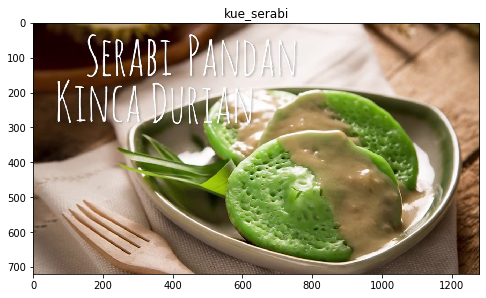

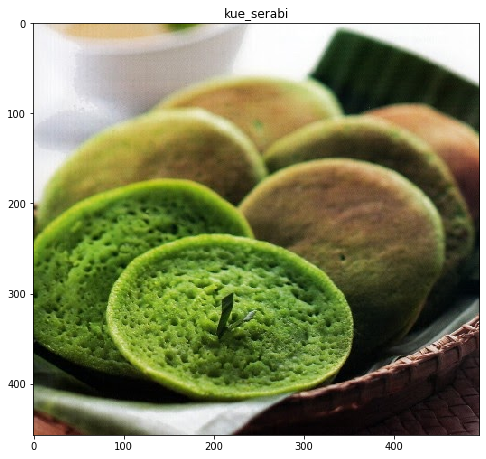

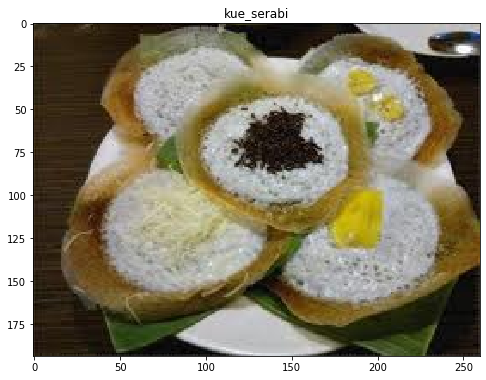

In [26]:
RAND_LAB = random.choice(lab)

RAND_LAB = lab[7]
PATH_TMP = PATH_DATA_TRAIN+RAND_LAB+'/'

for i in range(6):
    random_img = random.choice(os.listdir(PATH_TMP))
    img1 = cv2.imread(PATH_TMP+random_img)  
    img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
    plt.figure(figsize = (8,8))
    plt.title(RAND_LAB)
    plt.imshow(img1)

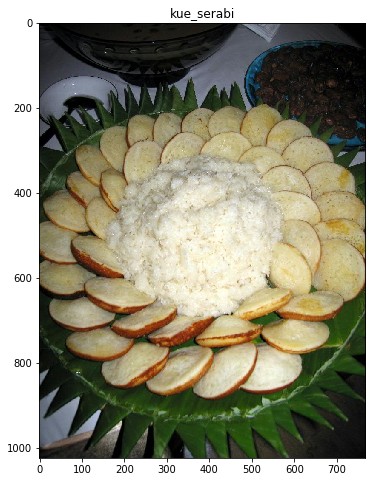

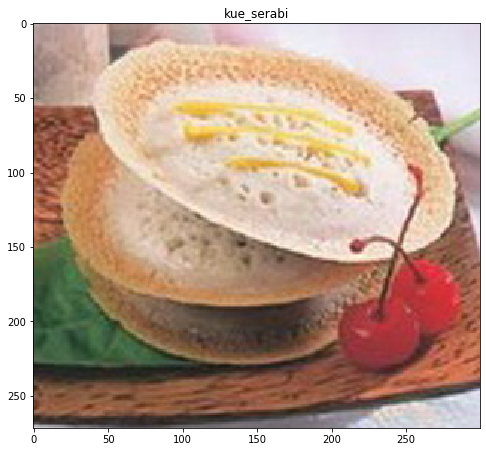

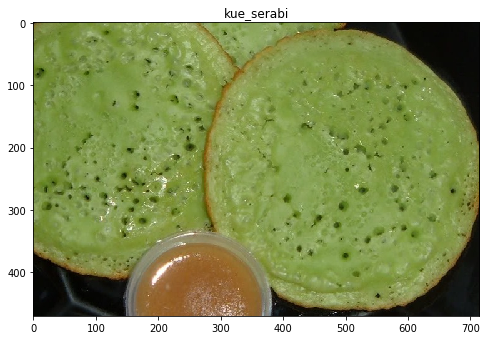

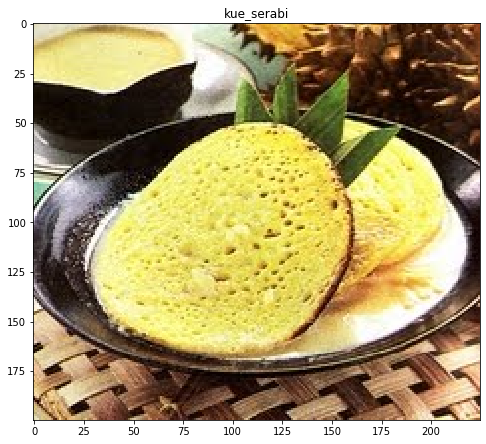

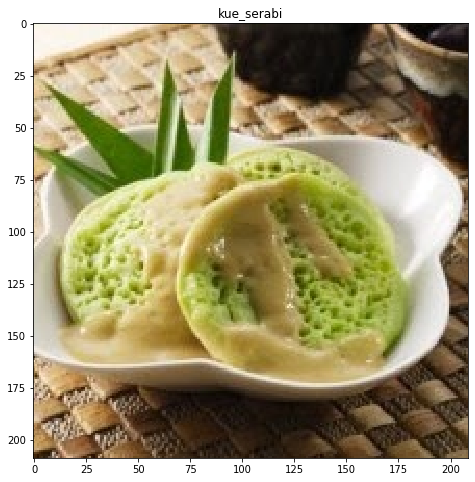

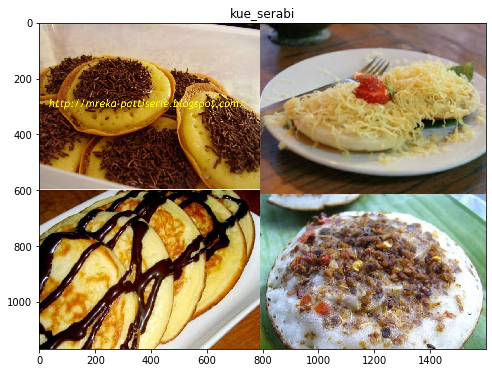

In [27]:
PATH_TMP = PATH_DATA_TEST+RAND_LAB+'/'

for i in range(6):
    random_img = random.choice(os.listdir(PATH_TMP))
    img1 = cv2.imread(PATH_TMP+random_img)  
    img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
    plt.figure(figsize = (8,8))
    plt.title(RAND_LAB)
    plt.imshow(img1)

In [29]:
data_train1_list = []
for i in lab:
    X = os.listdir(PATH_DATA_TRAIN+i)
    X1 = [PATH_DATA_TRAIN+i+'/'+j for j in X if '.ipynb' not in j]
    data_train1_list += X1
len(data_train1_list)

1516

In [30]:
# data_train1_list

In [14]:
## image sizes in training
train_list1_sample = random.choices(data_train1_list,k = 1000)
img_sizes = []
for im in train_list1_sample:
    img1 = cv2.imread(im)
    img_sizes.append(img1.shape)
data_sample_sizes = pd.DataFrame(img_sizes, columns = ['h','w','channel'])
data_sample_sizes['file'] = train_list1_sample

In [15]:
# im

In [16]:
data_sample_sizes.channel.unique()

array([3])

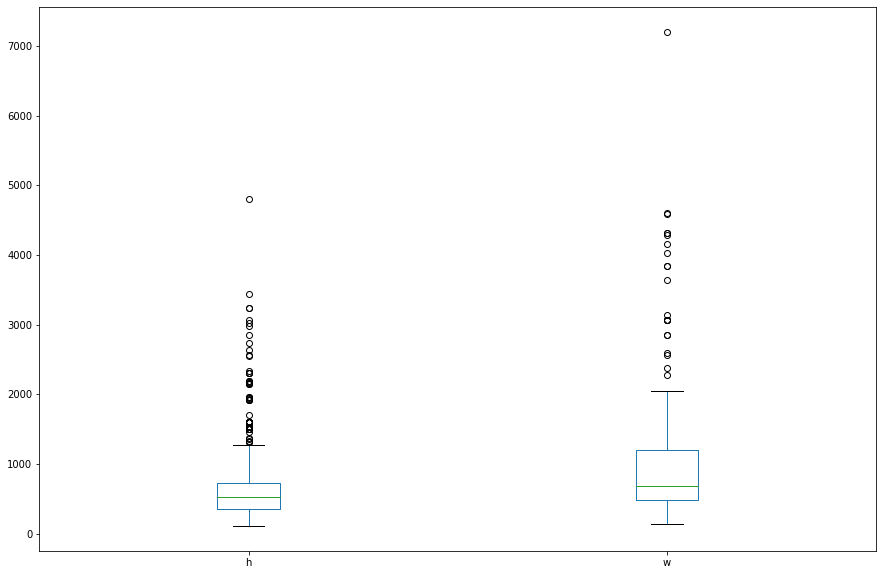

In [17]:
data_sample_sizes[['h','w']].plot(kind = 'box',figsize = (15,10))

In [18]:
data_sample_sizes[['h','w']].describe()

,h,w
count,1000.000000,1000.000000
mean,657.656000,850.717000
std,477.420909,601.104793
min,113.000000,150.000000
25%,360.000000,480.000000
50%,533.000000,681.500000
75%,731.250000,1200.000000
max,4799.000000,7199.000000


NOTES : we will resize the image into (128,128)